# 2110446 DATA SCIENCE AND DATA ENGINEERING

## **Unit 03:** Traditional Machine Learning

- **Problem:** Bank Marketing Dataset (`03_ml_02_2025s2`)
- **Author:** Worralop Srichainont
- **Year:** 2025 (Semester 2)

# Dependencies

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.exceptions import ConvergenceWarning

# Data Resources

File URL

In [2]:
FILE_PATH = "https://raw.githubusercontent.com/reisenx/2110446-DATA-SCI-ENG/refs/heads/main/03-Traditional-ML/Grader/03_ml_02_2025s2/code/bank-st.csv"

Load Files

In [3]:
df = pd.read_csv(FILE_PATH)

Display `DataFrame`

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,unknown,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,49,blue-collar,married,unknown,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,54,management,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,54,blue-collar,divorced,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Get brief insight of `DataFrame`

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000,41158.000000
mean,40.021381,258.316755,2.568711,962.448831,0.173089,0.081143,93.575359,-40.505591,3.620390,5167.018444
std,10.420315,259.356636,2.770709,186.976414,0.495059,1.571292,0.578941,4.628558,1.734758,72.274958
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Problem `Q1`

How many rows of `bank-st.csv` data are there in total?

In [6]:
print(f"The shape of the dataset is {df.shape}")
print(f"- There are {df.shape[0]} rows.")
print(f"- There are {df.shape[1]} columns.")

The shape of the dataset is (41158, 21)
- There are 41158 rows.
- There are 21 columns.


## Problem `Q2`

Find a tuple of numeric variables and categorical variables are presented in the dataset.

## Column Selection

To select columns by its data type, use `.select_dtypes()` from `pandas`. It has 2 parameters which are:
- `include` is the type of data to select.
- `exclude` is the type of data to not select.

Choose number type column by `include=["number"]`.

In [7]:
df_numeric = df.select_dtypes(include=["number"])
df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,46,348,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,59,386,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,49,73,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,54,230,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,54,208,1,999,0,1.1,93.994,-36.4,4.857,5191.0


Choose non-number type column by `exclude=["number"]`.

In [8]:
df_categorical = df.select_dtypes(exclude=["number"])
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,admin.,married,unknown,no,no,no,telephone,may,mon,nonexistent,no
1,technician,married,unknown,no,yes,no,telephone,may,mon,nonexistent,no
2,blue-collar,married,unknown,no,no,no,telephone,may,mon,nonexistent,no
3,management,married,basic.4y,unknown,yes,no,telephone,may,mon,nonexistent,no
4,blue-collar,divorced,basic.4y,no,no,no,telephone,may,mon,nonexistent,no


## Columns Amount

- To get amount of columns of a `DataFrame`, simply use `.shape[1]`.
- To get a list of all column names of a `DataFrame`, simply use `.columns`

In [9]:
print(f"There are {df_numeric.shape[1]} numeric columns")
for col_name in df_numeric.columns:
    print(f"- {col_name}")

There are 10 numeric columns
- age
- duration
- campaign
- pdays
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed


In [10]:
print(f"There are {df_categorical.shape[1]} categorical columns")
for col_name in df_categorical.columns:
    print(f"- {col_name}")

There are 11 categorical columns
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- day_of_week
- poutcome
- y


# Problem `Q3`

Calculate a ratio of negative class (`no`), and positive class (`yes`) on target column (`y`).

In [11]:
TARGET_COL = "y"

To get counts of each value in columns, use `.value_counts()`.

In [12]:
df[TARGET_COL].value_counts()

,count
y,
no,36518
yes,4640


Set `normalize=True` to normalize them into range $[0.0, 1.0]$

\begin{align*}
    \text{Class}_\text{no}  &= \frac{36518}{36518 + 4640} \approx 0.887 \\[1em]
    \text{Class}_\text{yes} &= \frac{4640}{36518 + 4640} \approx 0.113
\end{align*}

In [13]:
class_ratio = df[TARGET_COL].value_counts(normalize=True)
class_ratio

,proportion
y,
no,0.887264
yes,0.112736


To access the specific counts from `value_count()`, use value as index.

Also use `round(num, 3)` to round into 3 decimal places, and use `float()` to ensure `float` type (not `np.float64` type).

In [14]:
negative_ratio = float(round(class_ratio["no"], 3))
positive_ratio = float(round(class_ratio["yes"], 3))

print(f"The ratio of negative class is {negative_ratio}")
print(f"The ratio of positive class is {positive_ratio}")

The ratio of negative class is 0.887
The ratio of positive class is 0.113


# Problem `Q4`

Remove duplicate records from the data. What are the shape of the dataset afterward?

Amount of rows and columns before dropping duplicates

In [15]:
print(f"The shape of the dataset is {df.shape}")
print(f"- There are {df.shape[0]} rows.")
print(f"- There are {df.shape[1]} columns.")

The shape of the dataset is (41158, 21)
- There are 41158 rows.
- There are 21 columns.


To remove duplicates, use `.drop_duplicates()`

In [16]:
df = df.drop_duplicates()

Amount of rows and columns after dropping duplicates

In [17]:
print(f"The shape of the dataset is {df.shape}")
print(f"- There are {df.shape[0]} rows.")
print(f"- There are {df.shape[1]} columns.")

The shape of the dataset is (41146, 21)
- There are 41146 rows.
- There are 21 columns.


# Problem `Q5`

Please do as follows:
- Replace unknown value with `np.nan` (null value).
- Remove features with more than 99% flat values.
- Split the dataset into training and testing sets with $70:30$ ratio, use stratification with seed `0`.

After these operations, please answer the shape of `X_train` and `X_test`.

## Fill Null Values

Some rows in the dataset has `"unknown"` value in some column.

In [18]:
DISPLAY_COLS = ["job", "education", "housing"]
SEED = 607

In [19]:
display_indices = df.eq("unknown").any(axis=1)

df.loc[display_indices, DISPLAY_COLS].sample(n=10, random_state=607)

,job,education,housing
9756,admin.,high.school,yes
3970,blue-collar,basic.6y,unknown
14082,management,university.degree,yes
14655,blue-collar,basic.4y,yes
488,blue-collar,unknown,no
16342,blue-collar,basic.6y,yes
33273,blue-collar,basic.9y,yes
40684,retired,unknown,no
9033,unemployed,basic.6y,no
2824,unknown,university.degree,no


Replace all `"unknown"` with `np.nan` (null value) by using `.replace()`

In [20]:
df = df.replace("unknown", np.nan)

Check if all `"unknown"` are already replaced with null values

In [21]:
df.loc[display_indices, DISPLAY_COLS].sample(n=10, random_state=607)

,job,education,housing
9756,admin.,high.school,yes
3970,blue-collar,basic.6y,NaN
14082,management,university.degree,yes
14655,blue-collar,basic.4y,yes
488,blue-collar,NaN,no
16342,blue-collar,basic.6y,yes
33273,blue-collar,basic.9y,yes
40684,retired,NaN,no
9033,unemployed,basic.6y,no
2824,NaN,university.degree,no


## Remove Flat Features

Set removal threshold at 99% of flat values.

In [22]:
REMOVE_THRESHOLD = 0.99

Iterate each features to check if it has more than 99% flat values.
- Set `normalize=True` to get the percentage of each values.

In [23]:
drop_cols = []

for col_name in df.columns:
    max_percentage = df[col_name].value_counts(normalize=True).max()
    if max_percentage >= REMOVE_THRESHOLD:
        drop_cols.append(col_name)

Display how many column to drop.

In [24]:
print(f"There is {len(drop_cols)} column to drop.")
for col_name in drop_cols:
    print(f"- {col_name}")

There is 1 column to drop.
- default


Display value counts of a column to drop

In [25]:
df[drop_cols[0]].value_counts()

,count
default,
no,32558
yes,3


Drop column with 99% flat value.

In [26]:
df = df.drop(columns=drop_cols)

## Dataset Splitting

First, we separate the original `DataFrame` into:
- `X` is the features which are all column except the `y` column.
- `y` is the target which is only `y` column.

In [27]:
X = df.drop(columns=["y"])
y = df["y"]

Then, split the dataset into train dataset and test dataset by ratio `7:3`:
- **Train dataset** (70% of the dataset) uses for training the model.
- **Test dataset** (30% of the dataset) uses for testing the model.

**Stratification** can ensure that both train datasets and test dataset have the same `yes` and `no` proportions.

To split dataset, use `train_test_split()` function from `sklearn.model_selection`.
- `test_size` is the percentage of test dataset.
- `random_state` is random seed for ensuring the same result when running the code.
- Pass target to `stratify` parameter.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

Display shape of `X_train` and `X_test` after splitting.

In [29]:
print(f"The shape of X_train is {X_train.shape}.")
print(f"- It has {X_train.shape[0]} rows.")
print(f"- It has {X_train.shape[1]} columns.\n")

print(f"The shape of X_test is {X_test.shape}.")
print(f"- It has {X_test.shape[0]} rows.")
print(f"- It has {X_test.shape[1]} columns.")

The shape of X_train is (28802, 19).
- It has 28802 rows.
- It has 19 columns.

The shape of X_test is (12344, 19).
- It has 12344 rows.
- It has 19 columns.


# Problem `Q6`

Please do as follows:
- Impute missing values
    - For numeric variables, fill missing value with mean.
    - For categorical variables, fill missing value with mode.

Answer the shape of `X_train` after these operations.

## Column Selection

To select columns by its data type, use `.select_dtypes()` from `pandas`. It has 2 parameters which are:
- `include` is the type of data to select.
- `exclude` is the type of data to not select.

Then, use `.columns` to get a list of columns in that type.

Choose number type column by `include=["number"]`.

In [30]:
NUMERIC_COLS = X_train.select_dtypes(include=["number"]).columns

In [31]:
print(f"There are {len(NUMERIC_COLS)} numeric columns.")
for col_name in NUMERIC_COLS:
    print(f"- {col_name}")

There are 10 numeric columns.
- age
- duration
- campaign
- pdays
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed


Choose categorical type column by `exclude=["number"]`.

In [32]:
CATEGORICAL_COLS = X_train.select_dtypes(exclude=["number"]).columns

In [33]:
print(f"There are {len(CATEGORICAL_COLS)} categorical columns.")
for col_name in CATEGORICAL_COLS:
    print(f"- {col_name}")

There are 9 categorical columns.
- job
- marital
- education
- housing
- loan
- contact
- month
- day_of_week
- poutcome


## Fill Mean Value

For numerical column, fill missing value with mean value.

In [34]:
mean_values = X_train[NUMERIC_COLS].mean()

X_train[NUMERIC_COLS] = X_train[NUMERIC_COLS].fillna(mean_values)

Make sure to do this operation to `X_test` too, since we are going to use this for model prediction.

In [35]:
mean_values = X_test[NUMERIC_COLS].mean()

X_test[NUMERIC_COLS] = X_test[NUMERIC_COLS].fillna(mean_values)

## Fill Mode Value

Display categorical columns of `X_train` before filling missing values.

In [36]:
missing_indices = X_train[X_train[CATEGORICAL_COLS].isna().any(axis=1)].index

X_train.loc[missing_indices, CATEGORICAL_COLS].sample(n=10, random_state=67)

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
32567,management,single,university.degree,NaN,NaN,cellular,may,mon,nonexistent
11002,blue-collar,married,NaN,yes,yes,telephone,jun,wed,nonexistent
16223,services,single,NaN,yes,no,cellular,jul,tue,nonexistent
18563,NaN,married,NaN,yes,no,cellular,jul,thu,nonexistent
14210,blue-collar,single,basic.9y,NaN,NaN,cellular,jul,mon,nonexistent
40036,student,single,NaN,no,no,cellular,jul,thu,nonexistent
11498,services,divorced,NaN,no,no,telephone,jun,fri,nonexistent
3989,management,married,NaN,no,no,telephone,may,mon,nonexistent
12115,blue-collar,married,NaN,yes,no,telephone,jul,tue,nonexistent
38520,entrepreneur,NaN,university.degree,no,no,cellular,oct,thu,nonexistent


For categorical column, fill missing value with mode value.

Note that `.mode()` of each column returns as a series (`pd.Series`); hence, we need to use `.iloc[0]` to select only the first mode value of every columns.

In [37]:
mode_values = X_train[CATEGORICAL_COLS].mode().iloc[0]

X_train[CATEGORICAL_COLS] = X_train[CATEGORICAL_COLS].fillna(mode_values)

Display categorical columns of `X_train` after filling missing values.

In [38]:
X_train.loc[missing_indices, CATEGORICAL_COLS].sample(n=10, random_state=67)

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
32567,management,single,university.degree,yes,no,cellular,may,mon,nonexistent
11002,blue-collar,married,university.degree,yes,yes,telephone,jun,wed,nonexistent
16223,services,single,university.degree,yes,no,cellular,jul,tue,nonexistent
18563,admin.,married,university.degree,yes,no,cellular,jul,thu,nonexistent
14210,blue-collar,single,basic.9y,yes,no,cellular,jul,mon,nonexistent
40036,student,single,university.degree,no,no,cellular,jul,thu,nonexistent
11498,services,divorced,university.degree,no,no,telephone,jun,fri,nonexistent
3989,management,married,university.degree,no,no,telephone,may,mon,nonexistent
12115,blue-collar,married,university.degree,yes,no,telephone,jul,tue,nonexistent
38520,entrepreneur,married,university.degree,no,no,cellular,oct,thu,nonexistent


Make sure to do this operation to `X_test` too, since we are going to use this for model prediction.

In [39]:
mode_values = X_test[CATEGORICAL_COLS].mode().iloc[0]

X_test[CATEGORICAL_COLS] = X_test[CATEGORICAL_COLS].fillna(mode_values)

## Ordinal Data Mappings

**Ordinal Data** is a categorical data that has an order, can be compared.
- For example, shirt size is ordinal data because `S` < `M` < `L`

In this problem, we are going to deal with `education` variable which is ordinal data by converting them to an integer.

In [40]:
ORDINAL_COLS = "education"

Display `X_train` before applying mappings.

In [41]:
X_train[ORDINAL_COLS].sample(n=5, random_state=67)

,education
14685,professional.course
18521,high.school
7640,basic.4y
39052,basic.9y
4225,basic.9y


Create a mappings to convert the data into an integer.

In [42]:
EDUCATION_ORDER = {
    "illiterate": 1,
    "basic.4y": 2,
    "basic.6y": 3,
    "basic.9y": 4,
    "high.school": 5,
    "professional.course": 6,
    "university.degree": 7,
}

Apply mappings to the `education` column.

In [43]:
X_train[ORDINAL_COLS] = X_train[ORDINAL_COLS].map(EDUCATION_ORDER)

Display `X_train` after apply mappings

In [44]:
X_train[ORDINAL_COLS].sample(n=5, random_state=67)

,education
14685,6
18521,5
7640,2
39052,4
4225,4


Make sure to do this operation to `X_test` too.

In [45]:
X_test[ORDINAL_COLS] = X_test[ORDINAL_COLS].map(EDUCATION_ORDER)

## One-Hot encoding

**Nominal Data** is a categorical data that has no order, cannot be compared.
- For example, province is nominal data because Bangkok and Phuket cannot be compared

To select the nominal columns, just use `.select_dtype()` and exclude columns with numbers type.

Note that the `education` column is already a number from the previous step.

In [46]:
NOMINAL_COLS = X_train.select_dtypes(exclude=["number"]).columns

In [47]:
print(f"There are {len(NOMINAL_COLS)} nominal columns.")
for col_name in NOMINAL_COLS:
    print(f"- {col_name}")

There are 8 nominal columns.
- job
- marital
- housing
- loan
- contact
- month
- day_of_week
- poutcome


Display `X_train` before one-hot encoding.

In [48]:
X_train[NOMINAL_COLS].sample(n=5, random_state=67)

,job,marital,housing,loan,contact,month,day_of_week,poutcome
14685,technician,divorced,no,no,cellular,jul,tue,nonexistent
18521,services,married,no,no,cellular,jul,thu,nonexistent
7640,blue-collar,married,no,no,telephone,may,fri,nonexistent
39052,student,single,yes,no,cellular,dec,tue,nonexistent
4225,blue-collar,single,yes,no,telephone,may,tue,nonexistent


Apply one-hot encoding using `get_dummies()` from `pandas` library.

In [49]:
X_train = pd.get_dummies(X_train, columns=NOMINAL_COLS, dtype=int)

Display `X_train` after one-hot encoding.

In [50]:
X_train.sample(n=5, random_state=67)

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
14685,46,6,114,4,999,0,1.4,93.918,-42.7,4.961,...,0,0,0,0,0,1,0,0,1,0
18521,28,5,462,1,999,0,1.4,93.918,-42.7,4.968,...,0,0,0,0,1,0,0,0,1,0
7640,36,2,42,11,999,0,1.1,93.994,-36.4,4.864,...,0,0,1,0,0,0,0,0,1,0
39052,23,4,256,2,999,0,-3.0,92.713,-33.0,0.708,...,0,0,0,0,0,1,0,0,1,0
4225,52,4,202,1,999,0,1.1,93.994,-36.4,4.856,...,0,0,0,0,0,1,0,0,1,0


Make sure to do this operation to `X_test` too.

In [51]:
X_test = pd.get_dummies(X_test, columns=NOMINAL_COLS, dtype=int)

Display shape of `X_train` and `X_test` after one-hot encoding.

In [52]:
print(f"The shape of X_train is {X_train.shape}.")
print(f"- It has {X_train.shape[0]} rows.")
print(f"- It has {X_train.shape[1]} columns.\n")

print(f"The shape of X_test is {X_test.shape}.")
print(f"- It has {X_test.shape[0]} rows.")
print(f"- It has {X_test.shape[1]} columns.")

The shape of X_train is (28802, 49).
- It has 28802 rows.
- It has 49 columns.

The shape of X_test is (12344, 49).
- It has 12344 rows.
- It has 49 columns.


# Problem `Q7`

Use Logistic Regression as the model with the following parameters:
- Set `random_state` to `2025`.
- Set `class_weight` to `"balanced"`.
- Set `max_iter` to `500`.

Train the model using all the remaining available variables. 

What is the macro F1 score of the model on the test data rounded into 2 decimal places?

## Model Training

Create a Logistic Regression model

In [53]:
model = LogisticRegression(class_weight="balanced", max_iter=500, random_state=2025)

Train a model

In [54]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=500, random_state=2025)

## Model Prediction

In [55]:
y_pred = model.predict(X_test)

## Confusion Matrix

Given yes (`1`) is the `positive` class, and no (`0`) is `negative` class.
- **True Positive (TP)** means predicted `positive`, actual `positive`.
- **False Positive (FP)** means predicted `positive`, actual `negative`.
- **True Negative (TN)** means predicted `negative`, actual `negative`.
- **False Negative (FN)** means predicted `negative`, actual `positive`.

**NOTE:** `cmap` parameter is the color map of the visualization.

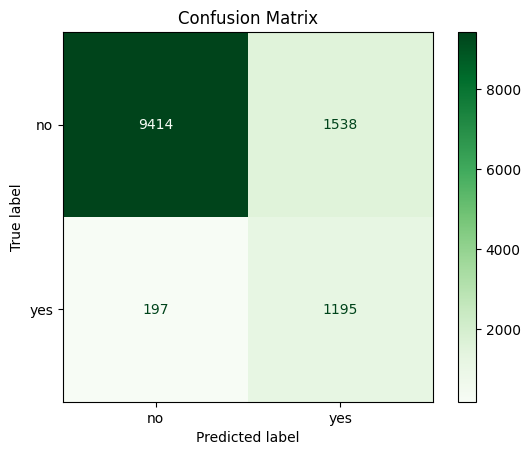

In [56]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap=plt.cm.Greens
)

plt.title("Confusion Matrix")
plt.show()

## Classification Report

**Class Metrics**
- **Precision** is the proportions of true positive (TP) by total positive predictions.
- **Recall** is the proportions of true positive (TP) by total actual positive.
- **Support** is the amount of actual data in the class.
- **F1 Score** is the harmonic mean of **Precision** and **Recall**

**Overall Metrics**
- **Accuracy** is the proportions of correct predictions by total predictions.
- **Macro F1 Score** is mean of per-class F1 score.
- **Weight Average F1 Score** is mean of per-class F1 score weighted by each class's support.

**NOTE:** `digits` parameter is the decimal places to display.

In [57]:
report = classification_report(y_test, y_pred, digits=3)

print(report)

              precision    recall  f1-score   support

          no      0.980     0.860     0.916     10952
         yes      0.437     0.858     0.579      1392

    accuracy                          0.859     12344
   macro avg      0.708     0.859     0.748     12344
weighted avg      0.918     0.859     0.878     12344



To get only F1 score, you can use `f1_score` from `sklearn.metrics`

Make sure to set `average="macro"` to get macro F1 score.

In [58]:
# Get a macro F1 score.
macro_f1 = f1_score(y_test, y_pred, average="macro")

# Display F1 scores with 2 decimal places.
print(f"The macro F1 score are {round(macro_f1, 2)}")

The macro F1 score are 0.75


# Grader

## Solution

Writing all problem inside the `BankLogistic` class, and then send it to the grader.

In [59]:
class BankLogistic:
    def __init__(self, data_path):
        """
        Class constructor method.

        Args:
            data_path (string): CSV dataset path
        """
        # Initialization attributes
        self.data_path = data_path
        self.df = pd.read_csv(data_path)

        # Additional attributes
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None

        self.model = None
        self.y_pred = None

    def Q1(self):
        """
        Q1: How many rows of data are there in total?
        """
        return self.df.shape[0]

    def Q2(self):
        """
        Q2: Return the tuple of numeric variables and categorical variables
            are presented in the dataset.
        """
        # Select columns by its data type.
        df_numeric = self.df.select_dtypes(include=["number"])
        df_categorical = self.df.select_dtypes(exclude=["number"])

        # Get column amount of numeric columns and categorical columns.
        n_col_numeric = df_numeric.shape[1]
        n_col_categorical = df_categorical.shape[1]

        # Return amount of numeric columns and categorical columns.
        return (n_col_numeric, n_col_categorical)

    def Q3(self):
        """
        Q3: Return the tuple of ratio the Class 0 (no)
            followed by Class 1 (yes) in 3 digits.
        """
        # Get ratio of both class in the dataset.
        class_ratio = self.df["y"].value_counts(normalize=True)

        # Rounded ratio into 3 decimal places
        negative_ratio = float(round(class_ratio["no"], 3))
        positive_ratio = float(round(class_ratio["yes"], 3))

        # Return as a tuple
        return (negative_ratio, positive_ratio)

    def Q4(self):
        """
        Q4: Remove duplicate records from the data.
            What are the shape of the dataset afterward?
        """
        self.df = self.df.drop_duplicates()
        return self.df.shape

    def Q5(self):
        """
        Q5: Do the following operations
            -   Replace "unknown" value with null.
            -   Remove features with more than 99% flat values.
            -   Split the dataset into training and testing sets with a 70:30 ratio.
                by stratification and use seed 0
            After these operations, return the tuple of X_train shape and X_test shape.
        """
        # Ensure that all processes in Q4 has already executed.
        self.Q4()

        # Replace all "unknown" in the entire DataFrame to null value.
        self.df = self.df.replace("unknown", np.nan)

        # Initialize list to store column name with 99% flat values.
        REMOVE_THRESHOLD = 0.99
        drop_cols = []

        # Iterate each column and find the one with 99% flat value.
        for col_name in self.df.columns:
            max_percentage = self.df[col_name].value_counts(normalize=True).max()
            if max_percentage >= REMOVE_THRESHOLD:
                drop_cols.append(col_name)

        # Drop the column with 99% flat value
        self.df = self.df.drop(columns=drop_cols)

        # Split features and target column.
        X = self.df.drop(columns=["y"])
        y = self.df["y"]

        # Split train dataset and test dataset by stratification.
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.3, stratify=y, random_state=0
        )

        # Return shape of X_train and X_test
        return (self.X_train.shape, self.X_test.shape)

    def Q6(self):
        """
        Q6: Do the following operations
            -	For numeric variables, impute missing values using the mean.
            -	For categorical variables, impute missing values using the mode.
            -   Map the nominal data for the education variable using the following order:
                -   Map "illiterate" to 1
                -   Map "basic.4y" to 2
                -   Map "basic.6y" to 3
                -   Map "basic.9y" to 4
                -   Map "high.school" to 5
                -   Map "professional.course" to 6
                -   Map "university.degree" to 7
            After these operations, return the shape of X_train.
        """
        # Ensure that all processes in Q4 to Q5 has already executed.
        self.Q5()

        # Selecting numeric columns and categorical columns
        NUMERIC_COLS = self.X_test.select_dtypes(include=["number"]).columns
        CATEGORICAL_COLS = self.X_test.select_dtypes(exclude=["number"]).columns

        # For numerical columns, fill missing value with mean value.
        mean_values = self.X_train[NUMERIC_COLS].mean()
        self.X_train[NUMERIC_COLS] = self.X_train[NUMERIC_COLS].fillna(mean_values)

        mean_values = self.X_test[NUMERIC_COLS].mean()
        self.X_test[NUMERIC_COLS] = self.X_test[NUMERIC_COLS].fillna(mean_values)

        # For categorical columns, fill missing value with mode value.
        mode_values = self.X_train[CATEGORICAL_COLS].mode().iloc[0]
        self.X_train[CATEGORICAL_COLS] = self.X_train[CATEGORICAL_COLS].fillna(
            mode_values
        )

        mode_values = self.X_test[CATEGORICAL_COLS].mode().iloc[0]
        self.X_test[CATEGORICAL_COLS] = self.X_test[CATEGORICAL_COLS].fillna(
            mode_values
        )

        # Create mappings for ordinal category columns (education).
        ORDINAL_COLS = "education"
        EDUCATION_ORDER = {
            "illiterate": 1,
            "basic.4y": 2,
            "basic.6y": 3,
            "basic.9y": 4,
            "high.school": 5,
            "professional.course": 6,
            "university.degree": 7,
        }

        # Apply mappings to the education column.
        self.X_train[ORDINAL_COLS] = self.X_train[ORDINAL_COLS].map(EDUCATION_ORDER)
        self.X_test[ORDINAL_COLS] = self.X_test[ORDINAL_COLS].map(EDUCATION_ORDER)

        # Apply one hot encoding for nominal categorical columns.
        NOMINAL_COLS = self.X_train.select_dtypes(exclude=["number"]).columns
        self.X_train = pd.get_dummies(self.X_train, columns=NOMINAL_COLS, dtype=int)
        self.X_test = pd.get_dummies(self.X_test, columns=NOMINAL_COLS, dtype=int)

        # Return shape of X_train
        return self.X_train.shape

    def Q7(self):
        """
        Q7: Train a Logistic Regression model with the following parameters
            -   Set "random_state" to 2025
            -   Set "class_weight" to "balanced"
            -   Set "max_iter" to 500.
            What is the macro F1 score of the model on the test data rounded
            in 2 decimal places.
        """
        # Ensure that all processes in Q4 to Q6 has already executed.
        self.Q6()

        # Ignore the convergence warning.
        warnings.filterwarnings("ignore", category=ConvergenceWarning)

        # Create a Logistic Regression model
        model = LogisticRegression(
            class_weight="balanced", max_iter=500, random_state=2025
        )

        # Train a model
        model.fit(self.X_train, self.y_train)

        # Model prediction
        self.y_pred = model.predict(self.X_test)

        # Calculate and return macro F1 score
        macro_f1 = f1_score(self.y_test, self.y_pred, average="macro")
        return float(round(macro_f1, 2))

## Run Test

Create a utility class `BankLogisticTest` to check if each method in the class works correctly.

Use `assert`, `try` and `except` to check if the result matches.

In [60]:
class BankLogisticTest:
    @staticmethod
    def run_tests():
        TESTCASES = (
            {"func_name": "Q1", "key": 41158},
            {"func_name": "Q2", "key": (10, 11)},
            {"func_name": "Q3", "key": (0.887, 0.113)},
            {"func_name": "Q4", "key": (41146, 21)},
            {"func_name": "Q5", "key": ((28802, 19), (12344, 19))},
            {"func_name": "Q6", "key": (28802, 49)},
            {"func_name": "Q7", "key": 0.75},
        )

        for testcase in TESTCASES:
            func_name = testcase["func_name"]
            key = testcase["key"]
            BankLogisticTest.run_test(func_name, key)

    @staticmethod
    def run_test(func_name, key):
        try:
            model = BankLogistic(FILE_PATH)
            result = getattr(model, func_name)()
            assert result == key, f"Expected {key} but got {result}"
        except Exception as e:
            print(f"{func_name} failed with {e}")
            return
        print(f"{func_name} passed.")

In [61]:
BankLogisticTest.run_tests()

Q1 passed.
Q2 passed.
Q3 passed.
Q4 passed.
Q5 passed.
Q6 passed.
Q7 passed.
